### 시각화

In [78]:
# count_and_plot 그리기 함수
from collections import Counter
from matplotlib import pyplot
def count_and_plot(y):
    counter = Counter(y)
    for k,v in counter.items():
        print('Class=%d, n=%d (%.3f%%)'%(k,v,v / len(y) * 100))
    pyplot.bar(counter.keys(), counter.values())
    pyplot.show()

### 여기부터

In [68]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [69]:
review = pd.read_csv("../review.csv", encoding="UTF-8")
review

,id,name,date,content
0,A000000192697,[2023어워즈/3년연속] 아누아 어성초 77 수딩 토너 350ml 어워즈 한정 기...,2023.11.30,피부타입 : 복합성요 토너 없이는 못살아요겨울 강철 추위도 버티게 해주는 저의 최애...
1,A000000192697,[2023어워즈/3년연속] 아누아 어성초 77 수딩 토너 350ml 어워즈 한정 기...,2023.11.28,다른 토너로 갈아탔다가 환절기 때 피부가 뒤집어지고 너무 안 돌아와서 다시 구매합니...
2,A000000192697,[2023어워즈/3년연속] 아누아 어성초 77 수딩 토너 350ml 어워즈 한정 기...,2023.11.26,"전 이거 하나로 흡토, 닦토 다 하고 있어요 자극없이 순하고 용량도 많아서 밤마다 ..."
3,A000000192697,[2023어워즈/3년연속] 아누아 어성초 77 수딩 토너 350ml 어워즈 한정 기...,2023.11.19,자극없이 순하고 결 정돈하기 좋은 토너예요👍🏻민감성 지성 복합성 다 두루 쓰기 좋아요
4,A000000192697,[2023어워즈/3년연속] 아누아 어성초 77 수딩 토너 350ml 어워즈 한정 기...,2023.11.11,이제는 제 화장대에 없는게 말이 안되는 재구매템정말이지 공병만 몇 십병 만들었을거에...
...,...,...,...,...
33595,A000000139057,아벤느 이드랑스 딥 모이스트로션 200ml,2021.01.24,후기보고 살짝 콧물 스킨토너 좀 점성이 있는줄 알았는데 막상 받아보니 아주 살짝있어...
33596,A000000139057,아벤느 이드랑스 딥 모이스트로션 200ml,2021.01.22,토너를 오래 찾던 중에 겨울에 쓸만한게 이 제품이 딱이더라구요! 저는 겨울되면 얼굴...
33597,A000000139057,아벤느 이드랑스 딥 모이스트로션 200ml,2021.01.22,속당김이 엄청 심한편이라 수분크림 . 에센스를 발라도 겨울엔 겉에만 유분기가있지 수...
33598,A000000139057,아벤느 이드랑스 딥 모이스트로션 200ml,2021.01.11,"수부지 피부, 지성피부에 아벤느 제품이 좋다고해서 처음 구매해봤는데 타 제품들과 달..."


In [72]:
review["content"] = review["content"].replace('', np.NaN)

non_kor_chars = re.compile('[^ 가-힣]')
review["content"] = review["content"].str.replace(pat=r'[^ 가-힣]', repl=r'', regex=True)
review = review.dropna()
review = review.reset_index(drop=True)
review

,id,name,date,content
0,A000000192697,[2023어워즈/3년연속] 아누아 어성초 77 수딩 토너 350ml 어워즈 한정 기...,2023.11.30,피부타입 복합성요 토너 없이는 못살아요겨울 강철 추위도 버티게 해주는 저의 최애템...
1,A000000192697,[2023어워즈/3년연속] 아누아 어성초 77 수딩 토너 350ml 어워즈 한정 기...,2023.11.28,다른 토너로 갈아탔다가 환절기 때 피부가 뒤집어지고 너무 안 돌아와서 다시 구매합니...
2,A000000192697,[2023어워즈/3년연속] 아누아 어성초 77 수딩 토너 350ml 어워즈 한정 기...,2023.11.26,전 이거 하나로 흡토 닦토 다 하고 있어요 자극없이 순하고 용량도 많아서 밤마다 화...
3,A000000192697,[2023어워즈/3년연속] 아누아 어성초 77 수딩 토너 350ml 어워즈 한정 기...,2023.11.19,자극없이 순하고 결 정돈하기 좋은 토너예요민감성 지성 복합성 다 두루 쓰기 좋아요
4,A000000192697,[2023어워즈/3년연속] 아누아 어성초 77 수딩 토너 350ml 어워즈 한정 기...,2023.11.11,이제는 제 화장대에 없는게 말이 안되는 재구매템정말이지 공병만 몇 십병 만들었을거에...
...,...,...,...,...
32396,A000000139057,아벤느 이드랑스 딥 모이스트로션 200ml,2021.01.24,후기보고 살짝 콧물 스킨토너 좀 점성이 있는줄 알았는데 막상 받아보니 아주 살짝있어...
32397,A000000139057,아벤느 이드랑스 딥 모이스트로션 200ml,2021.01.22,토너를 오래 찾던 중에 겨울에 쓸만한게 이 제품이 딱이더라구요 저는 겨울되면 얼굴이...
32398,A000000139057,아벤느 이드랑스 딥 모이스트로션 200ml,2021.01.22,속당김이 엄청 심한편이라 수분크림 에센스를 발라도 겨울엔 겉에만 유분기가있지 수분...
32399,A000000139057,아벤느 이드랑스 딥 모이스트로션 200ml,2021.01.11,수부지 피부 지성피부에 아벤느 제품이 좋다고해서 처음 구매해봤는데 타 제품들과 달리...


In [76]:
review.to_csv("review_final_preprocessed.csv", index=False)

In [3]:
ai_hub = pd.read_csv('../ai_hub_data.csv', encoding='UTF-8')
ai_hub

,SentimentText,SentimentPolarity
0,유통기한도 넉넉하고,1
1,구성도 많아서 선물 하기 좋네요.,1
2,구성도알차고,1
3,촉촉하고너무좋아용,1
4,대용량으로 넉넉하게 사용할 수 있고,1
...,...,...
51509,순하고,1
51510,번들거리는 게 없어 좋습니다.,1
51511,저렴하게 구매했네요.,1
51512,발림도 좋고,1


In [4]:
ai_hub["SentimentText"] = ai_hub["SentimentText"].str.replace('.', '')
ai_hub

C:\Users\Joy\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


,SentimentText,SentimentPolarity
0,유통기한도 넉넉하고,1
1,구성도 많아서 선물 하기 좋네요,1
2,구성도알차고,1
3,촉촉하고너무좋아용,1
4,대용량으로 넉넉하게 사용할 수 있고,1
...,...,...
51509,순하고,1
51510,번들거리는 게 없어 좋습니다,1
51511,저렴하게 구매했네요,1
51512,발림도 좋고,1


##### 데이터 불균형 해결

In [5]:
# 언더 샘플링
under_sample = RandomUnderSampler(sampling_strategy={0:3830, -1:10000, 1:10000})
x_random, y_random = under_sample.fit_resample(ai_hub[['SentimentText']], ai_hub['SentimentPolarity'])

In [110]:
x_random.to_csv("x_random.csv", index=False)
y_random.to_csv("y_random.csv", index=False)

Class=-1, n=10000 (41.964%)
Class=0, n=3830 (16.072%)
Class=1, n=10000 (41.964%)


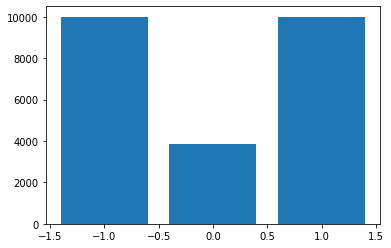

In [107]:
count_and_plot(y_random)

In [108]:
tf_idf_vec = TfidfVectorizer(stop_words="english", min_df=1).fit(x_random["SentimentText"])
tf_idf = tf_idf_vec.transform(x_random["SentimentText"]).toarray()

tf_idf.shape

(23830, 16342)

In [8]:
over_sample = SMOTE()
x_smote, y_smote = over_sample.fit_resample(pd.DataFrame(tf_idf), y_random)

Class=-1, n=10000 (33.333%)
Class=0, n=10000 (33.333%)
Class=1, n=10000 (33.333%)


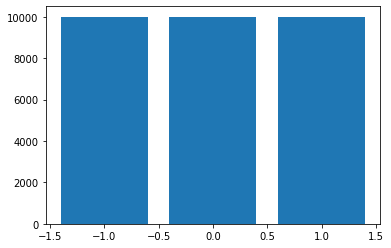

In [9]:
count_and_plot(y_smote)

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.2, random_state=42)

print(f"훈련 데이터 수: {len(x_train)}")
print(f"테스트 데이터 수: {len(x_test)}")

훈련 데이터 수: 24000
테스트 데이터 수: 6000


### Logistic Regression

In [32]:
model = LogisticRegression(C=10)
model.fit(x_train, y_train)

pred = model.predict(x_test)
acc_lr = accuracy_score(y_test, pred)
report = classification_report(y_test, pred)

print(f"예측 정확도: {acc_lr:.4f}")
print(report)

C:\Users\Joy\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


예측 정확도: 0.8795
              precision    recall  f1-score   support

          -1       0.87      0.83      0.85      2002
           0       0.92      0.94      0.93      2022
           1       0.85      0.87      0.86      1976

    accuracy                           0.88      6000
   macro avg       0.88      0.88      0.88      6000
weighted avg       0.88      0.88      0.88      6000



In [34]:
def predict_sentiment(sentence):
    vector = tf_idf_vec.transform([sentence]).toarray()
    prediction = model.predict(vector)[0]
    return prediction

sentence = "보습은 별로"
predict_sentiment(sentence)

-1

### PCA

In [10]:
from sklearn.decomposition import PCA

In [18]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5000, random_state=42)
pca.fit(x_smote)
tf_reduced = pca.transform(x_smote)

0.8724103688302906


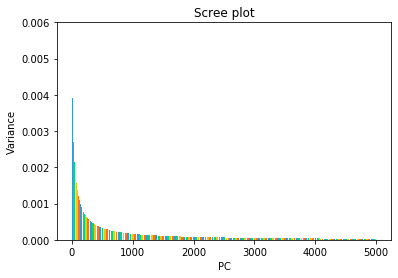

In [101]:
from matplotlib import pyplot as plt

def scree_plot(pca):
    ratio = pca.explained_variance_ratio_
    print(ratio.sum())
    num_components = len(ratio)
    ind = np.arange(num_components)
    vals = ratio
    
    ax = plt.subplot()
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals, color = ['#00da75', '#f1c40f',  '#ff6f15', '#3498db']) # Bar plot
    

    ax.set_xlabel("PC")
    ax.set_ylabel("Variance")
    plt.title('Scree plot')
    plt.ylim([0,0.006])
    
scree_plot(pca)

In [35]:
x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced = train_test_split(pd.DataFrame(tf_reduced), y_smote, test_size=0.2, random_state=42)

print(f"훈련 데이터 수: {len(x_train)}")
print(f"테스트 데이터 수: {len(x_test)}")

훈련 데이터 수: 24000
테스트 데이터 수: 6000


In [36]:
model_pca = LogisticRegression(C=10)
model_pca.fit(x_train_reduced, y_train_reduced)

pred = model_pca.predict(x_test_reduced)
acc_lr = accuracy_score(y_test_reduced, pred)
report = classification_report(y_test_reduced, pred)

print(f"예측 정확도: {acc_lr:.4f}")
print(report)

C:\Users\Joy\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


예측 정확도: 0.8698
              precision    recall  f1-score   support

          -1       0.84      0.83      0.84      2002
           0       0.92      0.93      0.93      2022
           1       0.84      0.85      0.84      1976

    accuracy                           0.87      6000
   macro avg       0.87      0.87      0.87      6000
weighted avg       0.87      0.87      0.87      6000



In [103]:
def predict_sentiment_pca(sentence):
    vector = tf_idf_vec.transform([sentence]).toarray()
    vector = pca.transform(pd.DataFrame(vector))
    prediction = model_pca.predict(vector)[0]
    return prediction

sentence = "보습은 그냥 그래요"
predict_sentiment_pca(sentence)

-1

TfidfVectorizer(stop_words='english')

In [102]:
import joblib
joblib.dump(model, './model/model.pk1')
joblib.dump(model_pca, './model/model_pca_5000.pk1')

['./model/model_pca_5000.pk1']

In [42]:
joblib.dump(tf_idf_vec, './model/tf_idf_vec.pk1')

['./model/tf_idf_vec.pk1']

In [98]:
joblib.dump(pca, './model/pca_5000.pk1')

['./model/pca_5000.pk1']

#### PCA 비교

In [ ]:
pca_test = PCA(n_components=2500, random_state=42)
pca_test.fit(x_smote)
tf_reduced_test = pca_test.transform(x_smote)

x_train_reduced_t, x_test_reduced_t, y_train_reduced_t, y_test_reduced_t = train_test_split(pd.DataFrame(tf_reduced_test), y_smote, test_size=0.2, random_state=42)


model_pca_test = LogisticRegression(C=10)
model_pca_test.fit(x_train_reduced_t, y_train_reduced_t)

0.7634603363030315


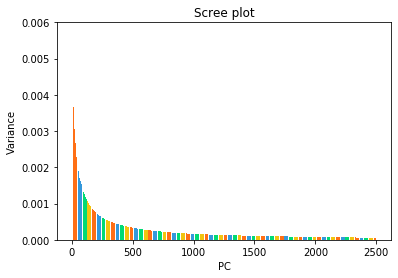

In [100]:
def scree_plot(pca):
    ratio = pca_test.explained_variance_ratio_
    print(ratio.sum())
    num_components = len(ratio)
    ind = np.arange(num_components)
    vals = ratio
    
    ax = plt.subplot()
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals, color = ['#00da75', '#f1c40f',  '#ff6f15', '#3498db']) # Bar plot
    

    ax.set_xlabel("PC")
    ax.set_ylabel("Variance")
    plt.title('Scree plot')
    plt.ylim([0,0.006])
    
scree_plot(pca)

In [94]:
pred = model_pca_test.predict(x_test_reduced_t)
acc_lr = accuracy_score(y_test_reduced_t, pred)
report = classification_report(y_test_reduced_t, pred)

print(f"예측 정확도: {acc_lr:.4f}")
print(report)

예측 정확도: 0.8650
              precision    recall  f1-score   support

          -1       0.85      0.81      0.83      2002
           0       0.91      0.91      0.91      2022
           1       0.83      0.87      0.85      1976

    accuracy                           0.86      6000
   macro avg       0.87      0.86      0.86      6000
weighted avg       0.87      0.86      0.86      6000



In [96]:
joblib.dump(model_pca_test, './model/model_pca_2500.pk1')

['./model/model_pca_2500.pk1']

In [99]:
joblib.dump(pca_test, './model/pca_2500.pk1')

['./model/pca_2500.pk1']